In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-analysis-prediction-using-lstm/__results__.html
/kaggle/input/stock-market-analysis-prediction-using-lstm/__resultx__.html
/kaggle/input/stock-market-analysis-prediction-using-lstm/__notebook__.ipynb
/kaggle/input/stock-market-analysis-prediction-using-lstm/__output__.json
/kaggle/input/stock-market-analysis-prediction-using-lstm/custom.css
/kaggle/input/stock-market-analysis-prediction-using-lstm/__results___files/__results___40_0.png
/kaggle/input/stock-market-analysis-prediction-using-lstm/__results___files/__results___31_1.png
/kaggle/input/stock-market-analysis-prediction-using-lstm/__results___files/__results___14_0.png
/kaggle/input/stock-market-analysis-prediction-using-lstm/__results___files/__results___28_1.png
/kaggle/input/stock-market-analysis-prediction-using-lstm/__results___files/__results___33_1.png
/kaggle/input/stock-market-analysis-prediction-using-lstm/__results___files/__results___29_1.png
/kaggle/input/stock-market-analysis-prediction-u

installing yfinace on kaggle platform

In [8]:
!pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 4.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-cp310-cp310-linux_x86_64.whl size=293377 sha256=0db7d101bd6a5b69c3a63b8173a7c187030bd0b6bbcae74cba7dbeea6d402db9
  Stored in directory: /root/.cache/pip/wheels/06/80/9b/98db0d58349a2f5c09f8406789ade4270762f97b7d26f2fa22
Successfully built peewee


You can use the yfinance library to download historical stock price data from Yahoo Finance. Here's a sample code snippet:

In [9]:
import yfinance as yf
import pandas as pd

# Download historical data for a specific stock (e.g., Apple)
ticker = 'AAPL'
data = yf.download(ticker, start='2000-01-01', end='2023-01-01')

# Save to CSV
data.to_csv('apple_stock_data.csv')


[*********************100%%**********************]  1 of 1 completed


Preparing the Data

Ensure that the CSV file is cleaned and structured properly. You might want to drop columns that are not necessary for the LSTM model, such as Adj Close.

In [10]:
import pandas as pd

# Load the data
data = pd.read_csv('apple_stock_data.csv')

# Drop columns that are not needed
data = data[['Date', 'Close']]

# Set the date as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Save the cleaned data to a new CSV file
data.to_csv('cleaned_apple_stock_data.csv')


Updated Example Code with Yahoo Finance Data

Below is the updated LSTM example code using the cleaned stock data from Yahoo Finance:

import libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

2024-06-26 06:36:41.023181: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 06:36:41.023288: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 06:36:41.147442: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Load Data

In [12]:
data = pd.read_csv('cleaned_apple_stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

Preprocessing

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Buld LSTM model

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


compile and train the model

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=1)

4528/4528 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - loss: 3.6408e-04


make predictions

inverse transform the prediction and the true value

In [20]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

reshape y train and y_test to be 2-dimensional

In [22]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

In [24]:
# Calculate the length of training data
train_data_len = len(train_data)

# Get the date index for plotting
train_plot = data[:train_data_len].index
test_plot = data[train_data_len:].index

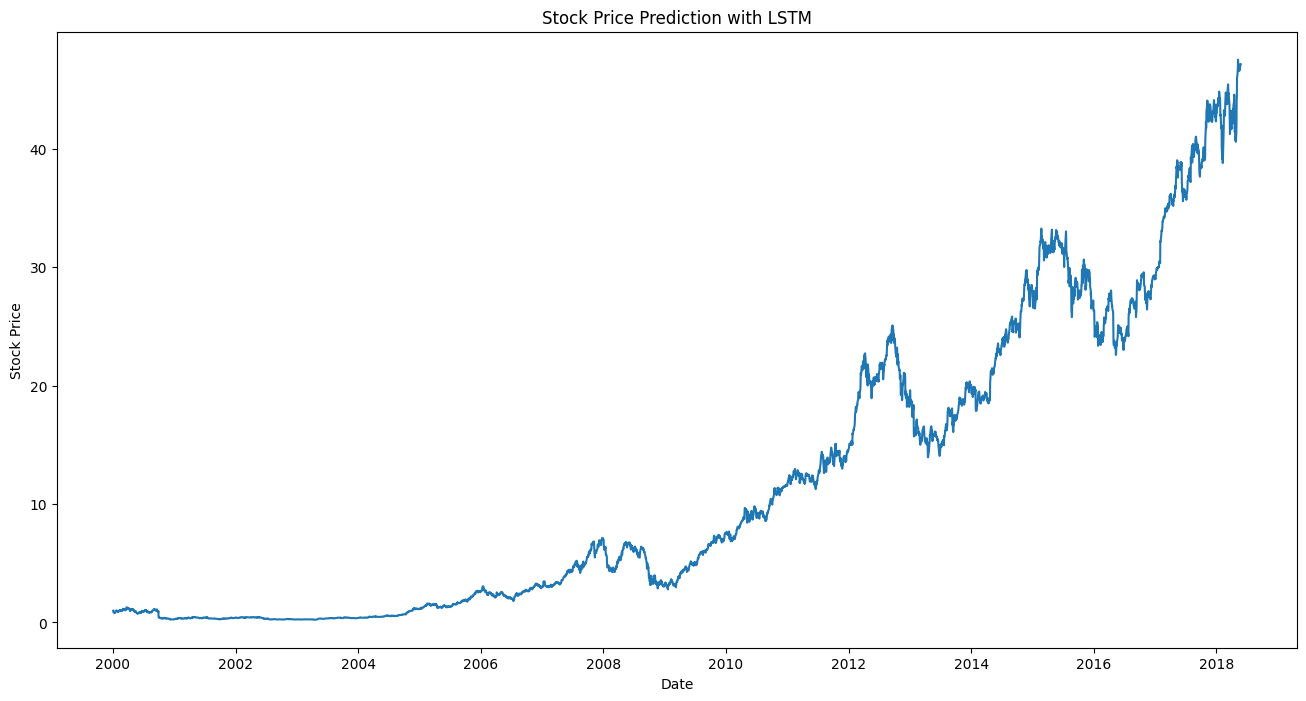

In [25]:
# Plotting the results
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')

# Plot the training data
plt.plot(train_plot, scaler.inverse_transform(scaled_data[:train_data_len]), label='Train Data')


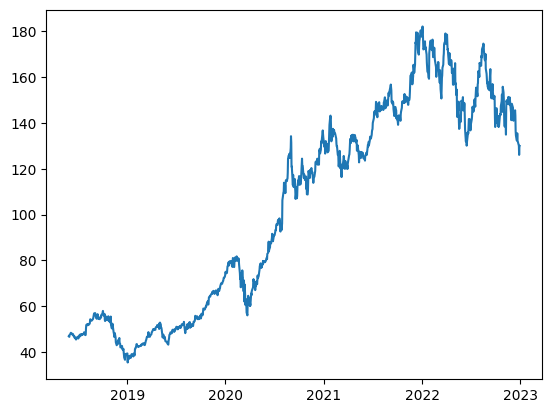

In [26]:
# Plot the actual test data
plt.plot(test_plot, scaler.inverse_transform(scaled_data[train_data_len:]), label='Actual Prices')


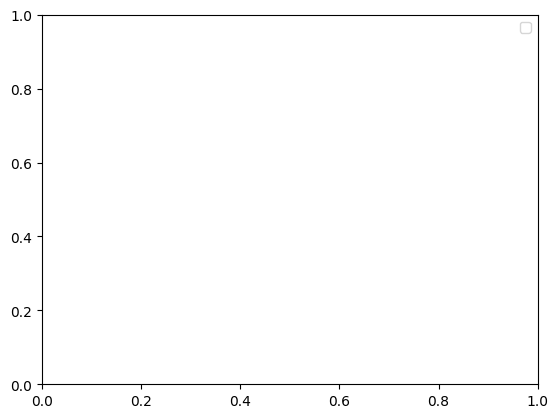

In [28]:
# Plot the predicted test data
plt.plot(test_plot[time_step:], test_predict, label='Predicted Prices')

# plt.legend()
# plt.show()